In [1]:
# imports

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
#os.chdir('/Users/mateus.ferracini/Documents/pers/projects/case_sulamerica/')
os.chdir('/media/babu/shared_driver/workspace/case_sulamerica')
from src.utils import sulamerica 

In [2]:
# import module with functions for the analysis, load data and do first cleaninf
sl = sulamerica.Sulamerica()

df = sl.read_data('data/cases_internacao_SUS.xls')
df = sl.rename_data(df)
df = df[df['AIH_aprovadas']>0]

df.head()

,Região/Unidade da Federação,Internações,AIH_aprovadas,Valor_total,Valor_serviços_hospitalares,Val_serv_hosp_-_compl_federal,Val_serv_hosp_-_compl_gestor,Valor_serviços_profissionais,Val_serv_prof_-_compl_federal,Val_serv_prof_-_compl_gestor,Valor_médio_AIH,Valor_médio_intern,Dias_permanência,Média_permanência,Óbitos,Taxa_mortalidade,sheet_name,period,Regiao
0,Região Norte,75363.0,75363.0,65821821.59,50592273.10,282125,-,14820122.53,-,-,873.40,873.40,358202.0,4.8,2149.0,2.85,jul19,2019-07,NORTE_TOTAL
1,Rondônia,9603.0,9603.0,9404751.41,7666945.90,-,-,1737805.51,-,-,979.36,979.36,53043.0,5.5,315.0,3.28,jul19,2019-07,NORTE
2,Amazonas,16248.0,16248.0,15624312.73,12166634.07,1221.31,-,3455637.92,-,-,961.61,961.61,85512.0,5.3,536.0,3.30,jul19,2019-07,NORTE
3,Roraima,4324.0,4324.0,3137537.40,2356231.68,-,-,781305.72,-,-,725.61,725.61,25560.0,5.9,171.0,3.95,jul19,2019-07,NORTE
4,Pará,34774.0,34774.0,28178633.44,21241354.07,248197,-,6581738.70,-,-,810.34,810.34,138135.0,4.0,832.0,2.39,jul19,2019-07,NORTE


In [4]:
df.dtypes

Região/Unidade da Federação       object
Internações                      float64
AIH_aprovadas                    float64
Valor_total                      float64
Valor_serviços_hospitalares      float64
Val_serv_hosp_-_compl_federal     object
Val_serv_hosp_-_compl_gestor      object
Valor_serviços_profissionais     float64
Val_serv_prof_-_compl_federal     object
Val_serv_prof_-_compl_gestor      object
Valor_médio_AIH                  float64
Valor_médio_intern               float64
Dias_permanência                 float64
Média_permanência                float64
Óbitos                           float64
Taxa_mortalidade                 float64
sheet_name                        object
period                            object
Regiao                            object
dtype: object

In [5]:
# transform some variables to correct type
df['Val_serv_hosp_-_compl_federal'] = pd.to_numeric(df['Val_serv_hosp_-_compl_federal'], errors='coerce')
df['Val_serv_hosp_-_compl_gestor'] = pd.to_numeric(df['Val_serv_hosp_-_compl_gestor'], errors='coerce')

df['Val_serv_prof_-_compl_federal'] = pd.to_numeric(df['Val_serv_prof_-_compl_federal'], errors='coerce')
df['Val_serv_prof_-_compl_gestor'] = pd.to_numeric(df['Val_serv_prof_-_compl_gestor'], errors='coerce')
df = df.fillna(0)

In [6]:
#add some variables and keep only relevant ones
df['hospitalar_total'] = (df['Valor_serviços_hospitalares'] + df['Val_serv_hosp_-_compl_federal'] + df['Valor_serviços_hospitalares'])
df['servicos_total'] = (df['Val_serv_prof_-_compl_federal'] + df['Val_serv_prof_-_compl_gestor'] + df['Valor_serviços_profissionais'])
df['calculado_total'] = df['hospitalar_total'] + df['servicos_total']
df['percentual_servicos'] = df['servicos_total'] / df['calculado_total']
df['percentual_hospitalar'] = df['hospitalar_total'] / df['calculado_total']
df = df[['period', 'Região/Unidade da Federação', 'Internações', 'AIH_aprovadas',
       'Valor_total', 'Valor_médio_AIH', 'Valor_médio_intern',
       'Dias_permanência', 'Média_permanência', 'Óbitos', 'Taxa_mortalidade',
        'Regiao', 'hospitalar_total', 'servicos_total',
       'calculado_total', 'percentual_servicos', 'percentual_hospitalar']]


In [7]:
df.columns

Index(['period', 'Região/Unidade da Federação', 'Internações', 'AIH_aprovadas',
       'Valor_total', 'Valor_médio_AIH', 'Valor_médio_intern',
       'Dias_permanência', 'Média_permanência', 'Óbitos', 'Taxa_mortalidade',
       'Regiao', 'hospitalar_total', 'servicos_total', 'calculado_total',
       'percentual_servicos', 'percentual_hospitalar'],
      dtype='object')

# EDA

O primeiro passo será conduzir uma análise exploratória para observar o comportamento das variáveis e extrair alguns insights.
A primeira coisa que vamos fazer é um sanity check para ver se não temos nenhum dados faltando e depois explorar a evolução das principais variáveis no período e tentar entender se existe alguma .


In [8]:
df['period'].sort_values().value_counts()

2018-09    33
2018-12    33
2018-03    33
2019-02    33
2018-07    33
2018-08    33
2017-12    33
2019-01    33
2019-06    33
2018-05    33
2019-04    33
2018-04    33
2018-11    33
2019-07    32
Name: period, dtype: int64

In [9]:
df['Região/Unidade da Federação'].value_counts()

Amazonas               14
Região Nordeste        14
Santa Catarina         14
Total                  14
Sergipe                14
Minas Gerais           14
Rio Grande do Norte    14
Pará                   14
Região Sudeste         14
Alagoas                14
Ceará                  14
Distrito Federal       14
Mato Grosso            14
Rio Grande do Sul      14
Rondônia               14
Região Norte           14
Amapá                  14
São Paulo              14
Maranhão               14
Tocantins              14
Mato Grosso do Sul     14
Espírito Santo         14
Região Centro-Oeste    14
Bahia                  14
Rio de Janeiro         14
Piauí                  14
Pernambuco             14
Roraima                14
Paraíba                14
Paraná                 14
Região Sul             14
Goiás                  14
Acre                   13
Name: Região/Unidade da Federação, dtype: int64

In [10]:
df['period'].sort_values().unique()

array(['2017-12', '2018-03', '2018-04', '2018-05', '2018-07', '2018-08',
       '2018-09', '2018-11', '2018-12', '2019-01', '2019-02', '2019-04',
       '2019-06', '2019-07'], dtype=object)

Como podemos ver esta faltando uma observação para o Estado do Acre no período 2019-07. Dessa forma sabemos que o valor das variáveis da região norte para o período estão subestimados (no caso de variáveis absolutas e.g. internações, valores e etc.). Também podemos ver que temos diversos períodos faltando, de forma que para que seja possível estimar um modelo, teremos que inputar esses períodos.

Agora Vamos ver a evolução de algumas variáveis. Primeiro vamos olhas em um nível mais macro.

In [11]:
df = sl.add_period_data(df)

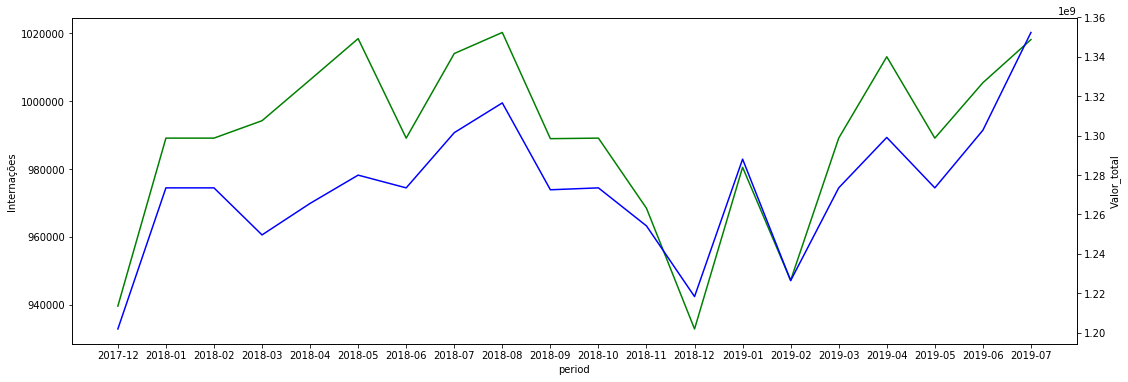

In [14]:

temp_df = df[df['Região/Unidade da Federação']=='Total'].sort_values(by=['period'])

temp_df['Internações'] = temp_df['Internações'].fillna((temp_df['Internações'].mean()))
temp_df['Valor_total'] = temp_df['Valor_total'].fillna((temp_df['Valor_total'].mean()))


plt.figure(figsize=(18, 6))
sns.lineplot(x='period', y='Internações', data=temp_df, sort=True, color='g')
ax2 = plt.twinx()
sns.lineplot(x='period', y='Valor_total', data=temp_df,  ax=ax2, sort=True, color='b');
ax.set_xticks(range(17))

plt.show()


Como esperado existe uma correlação positiva entre o número total de internações e o valor total gasto.


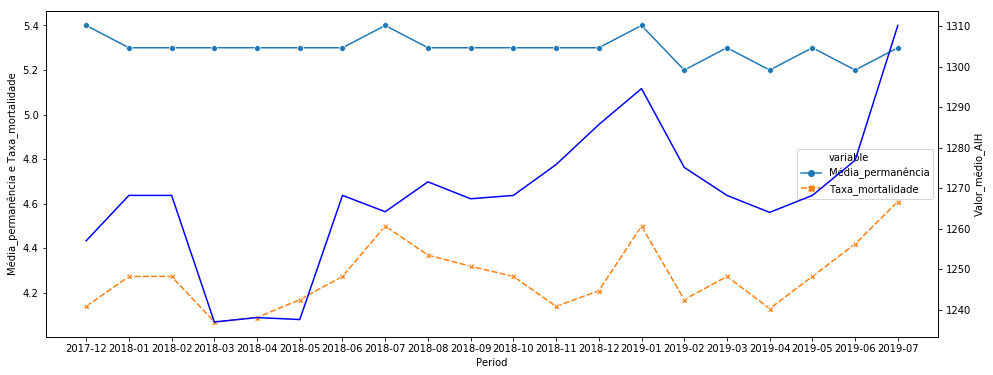

In [16]:
plt.figure(figsize=(16, 6))

temp_df['Média_permanência'] = temp_df['Média_permanência'].fillna((temp_df['Média_permanência'].mean()))
temp_df['Taxa_mortalidade'] = temp_df['Taxa_mortalidade'].fillna((temp_df['Taxa_mortalidade'].mean()))
temp_df['Valor_médio_AIH'] = temp_df['Valor_médio_AIH'].fillna((temp_df['Valor_médio_AIH'].mean()))


melt_df = pd.melt(temp_df, id_vars=['Regiao', 'period'], value_vars=['Média_permanência', 'Taxa_mortalidade']) 
ax = sns.lineplot(x='period', y='value', data=melt_df, sort=True, hue='variable', markers=True,style="variable")
ax.set(xlabel='Period', ylabel='Média_permanência e Taxa_mortalidade')
ax2 = plt.twinx()
sns.lineplot(x='period', y='Valor_médio_AIH', data=temp_df,  ax=ax2, sort=True, color='b', markers=True);

A taxa de mortalidade aparentemente vem crescendo levemente. É interessante observar que ocorreu uma queda na média de permanência, especialmente apartir de 2019-02. Outro fato interessante é que mesmo com uma queda na média de permanência o valor médio da AIH vem aumentando constantemente. Pode ser que a composição dos custos (serviços e hospitalar) tenha mudado... Mas, como mostrado no gráfico abaixo, eles permaneceram relativamente constantes no período analisado.

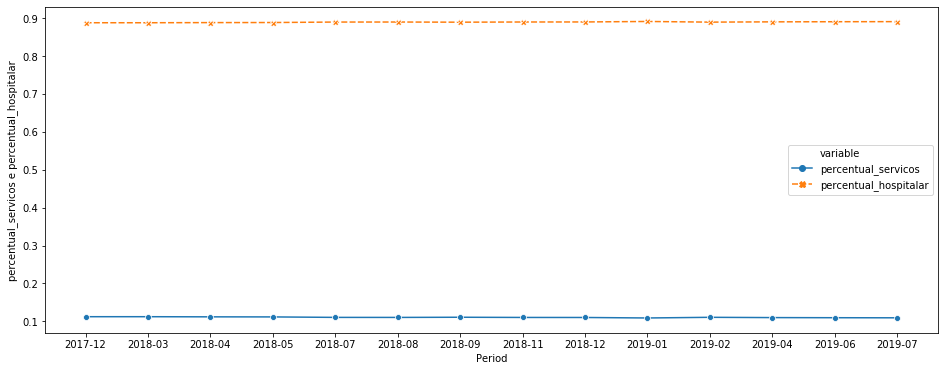

In [45]:
plt.figure(figsize=(16, 6))

melt_df = pd.melt(temp_df, id_vars=['Regiao', 'period'], value_vars=['percentual_servicos', 'percentual_hospitalar'])
ax = sns.lineplot(x='period', y='value', data=melt_df, sort=True, hue='variable', markers=True, style="variable")
ax.set(xlabel='Period', ylabel='percentual_servicos e percentual_hospitalar');


Para entender melhor vamos avaliar os dados por região.

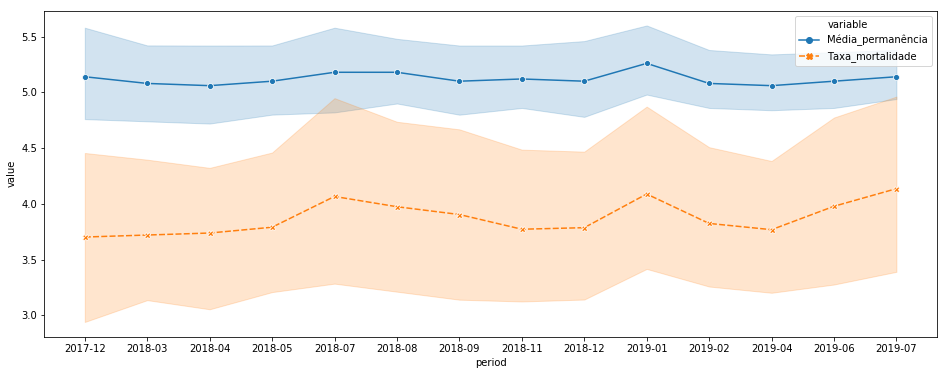

In [20]:
temp_df = df[df['Regiao'].str.contains("_TOTAL",na=False)].sort_values(by=['period'])
melt_df = pd.melt(temp_df, id_vars=['Regiao', 'period'], value_vars=['Média_permanência', 'Taxa_mortalidade'])
plt.figure(figsize=(16, 6))
sns.lineplot(x='period', y='value', data=melt_df, sort=True, hue='variable', markers=True,style="variable");


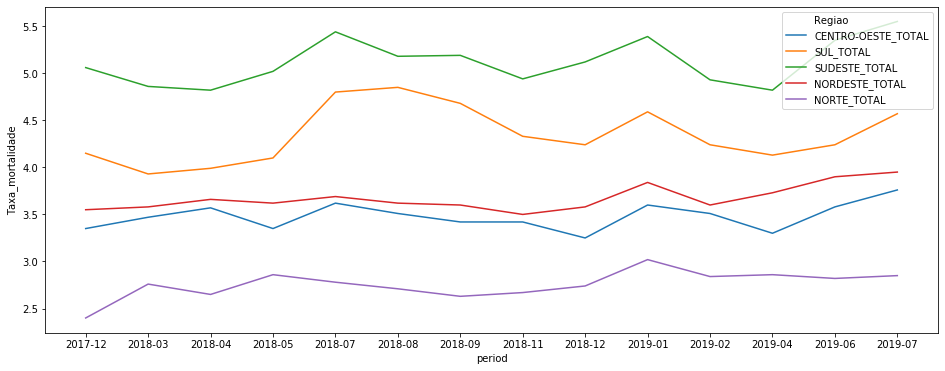

In [52]:
plt.figure(figsize=(16, 6))
sns.lineplot(x='period', y='Taxa_mortalidade', data=temp_df, sort=True, hue='Regiao', markers=True);


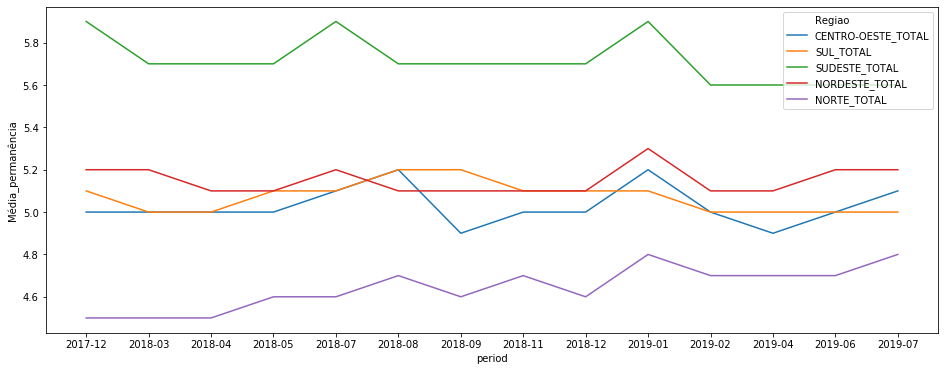

In [53]:
plt.figure(figsize=(16, 6))
sns.lineplot(x='period', y='Média_permanência', data=temp_df, sort=True, hue='Regiao', markers=True);


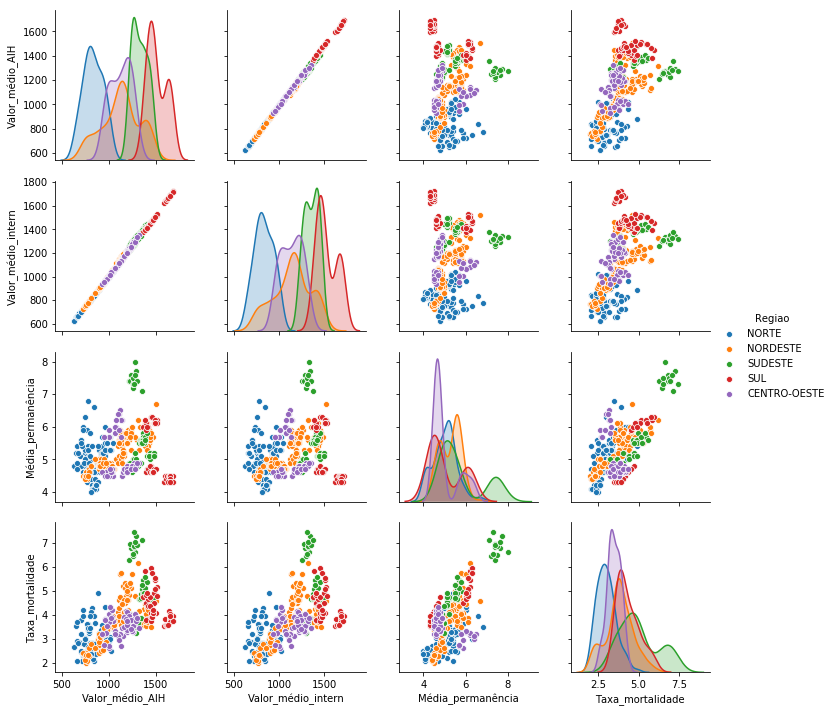

In [54]:
temp_df = df[['Regiao','Valor_médio_AIH', 'Valor_médio_intern',
              'Média_permanência','Taxa_mortalidade']]
temp_df = temp_df[~temp_df['Regiao'].str.contains("TOTAL", na=False)].dropna()
sns.pairplot(data=temp_df, hue='Regiao');

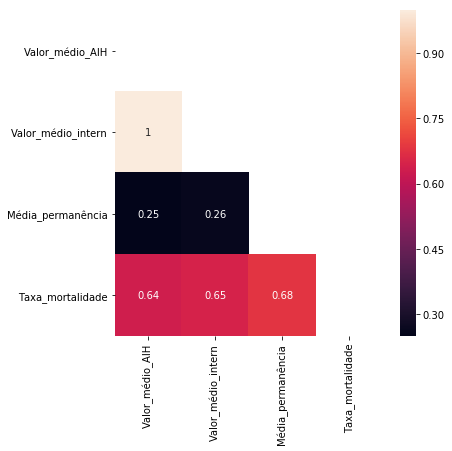

In [66]:
temp_df = df[['Valor_médio_AIH', 'Valor_médio_intern',
              'Média_permanência','Taxa_mortalidade']]

fig, ax = plt.subplots(figsize=(6, 6)) 
mask = np.zeros_like(temp_df.corr())
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(temp_df.corr(), mask= mask, ax= ax, annot= True);


Como podemos ver o comportamento entre as regiões é bem diferente, tanto em nível como em tendência. Tal fato indica que talvez seja melhor trabalhar com as séries desagregadas (a nível UF), principalmente para imputar os dados para os períodos que não estão na base.
É possível ver que dentro das regiões também existem comportamentos muito distinto.

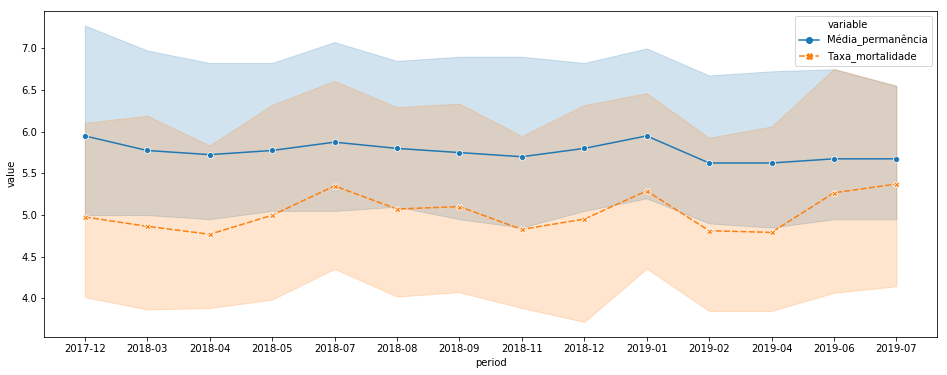

In [49]:
temp_df = df[df['Regiao']=='SUDESTE'].sort_values(by=['period'])
melt_df = pd.melt(temp_df, id_vars=['Regiao', 'period'], value_vars=['Média_permanência', 'Taxa_mortalidade'])
plt.figure(figsize=(16, 6))
sns.lineplot(x='period', y='value', data=melt_df, sort=True, hue='variable', markers=True,style="variable");

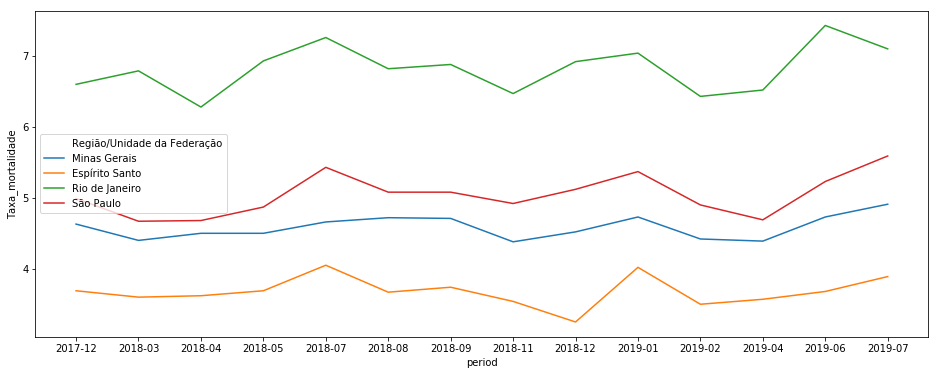

In [50]:
plt.figure(figsize=(16, 6))
sns.lineplot(x='period', y='Taxa_mortalidade', data=temp_df, sort=True, hue='Região/Unidade da Federação', markers=True);

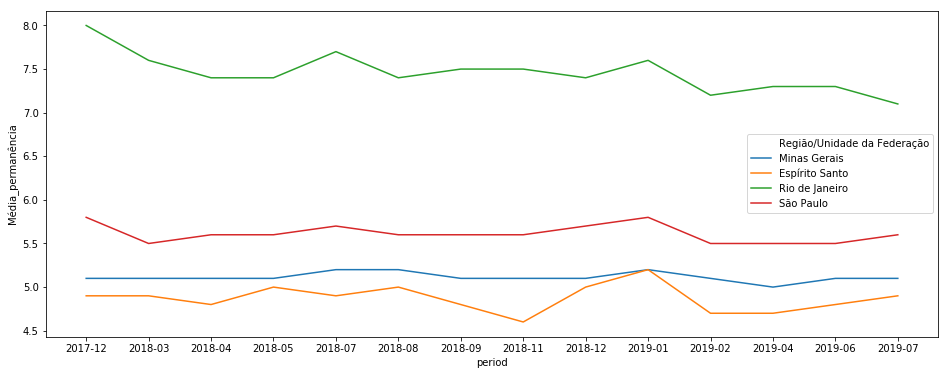

In [51]:
plt.figure(figsize=(16, 6))
sns.lineplot(x='period', y='Média_permanência', data=temp_df, sort=True, hue='Região/Unidade da Federação', markers=True);

# Impute Missing Values
